# Simple Japanese Receipt OCR Tool

This notebook demonstrates the implementation of PaddleOCR [[1](https://github.com/PaddlePaddle/PaddleOCR)] for Japanese text recognition. As someone new to Computer Vision, I found OCR to be an good starting point into this field. The code processes Japanese receipts, creating an image of detected text regions alongside the recognized text.

PaddleOCR was chosen for its robust multilingual support and built-in confidence scoring. The visualization approach helps in understanding how the OCR engine interprets text regions and how confident it is in its predictions.

Key features included:
- Text region detection with bounding boxes
- Japanese character recognition
- Confidence score visualization
- Side-by-side comparison of original and processed images

_Note_: This is a learning project, focused on understanding basic Computer Vision concepts through application. It's a tool wherein an comparative image is yielded.

# Understanding OCR: From A to Python


Optical Character Recognition (OCR) refers to a technology that harnesses extraction of automated data to convert images of text into a machine-readable format [[2](https://www.ibm.com/topics/optical-character-recognition)].

## Applications
OCR has been leveraged in the folllowing [[3](https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/overview-ocr)]:
- Document digitization in offices
- License plate recognition
- Bank check processing
- Passport verification at airports
- Automated data entry from forms
- Receipt processing for expense tracking
- Archiving historical documents


## OCR with Python
Python has become a go-to language for OCR implementation. Some of the known libraries include PyTesseract, EasyOCR, and PaddleOCR.

This project aims to extract and visualize Japanese text from receipt images using PaddleOCR, creating a side-by-side comparison that shows both the original receipt with detected text regions and a clean representation of the recognized text with confidence scores. 

The goal is to demonstrate how OCR technology can accurately process Japanese receipts while providing visual feedback on the detection and recognition process.

# Methodology
Here is a breakdown of the OCR processing pipeline, from setting up to the final output.


## Prerequisites
1. Have a Japanese text image ready for processing. The image that I used is a [receipt](https://travel.stackexchange.com/questions/152616/does-sales-tax-exemption-apply-when-paying-with-a-foreign-credit-card-in-japan) from Lawson.
2. Obtain a Japanese font file (TTC/TTF format). I got mine from this [link](https://github.com/PaddlePaddle/PaddleOCR/blob/main/doc/fonts/japan.ttc).
3. Install required Python packages:
   - OpenCV (opencv-python)
   - PaddlePaddle
   - PaddleOCR

## Step-by-Step Procedure

### 1. Environment Setup
1. Import all necessary Python libraries
2. Set up paths to your image and font files
3. Configure matplotlib for Japanese text display

### 2. OCR Configuration
1. Initialize PaddleOCR with Japanese language support
2. Enable angle classification for rotated text detection
3. Set up text recognition parameters

### 3. Image Preparation
1. Load the source image using OpenCV
2. Convert the image color space from BGR to RGB
3. Create a blank white image of the same size

### 4. Text Recognition Process
1. Run OCR on the prepared image
2. Extract the recognition results:
   - Text bounding boxes
   - Recognized Japanese text
   - Confidence scores for each detection

### 5. Visualization Setup
1. Create a side-by-side comparison layout
2. Set up the left panel for original image
3. Set up the right panel for text display
4. Configure display parameters (figure size, titles)

### 6. Result Visualization
1. Display original image with detection boxes
2. For each detected text region:
   - Draw bounding boxes on both panels
   - Calculate text position
   - Add text labels with confidence scores
3. Apply final formatting (remove axes, adjust layout)

### 7. Output Generation
1. Save the visualization as a high-resolution PNG file
2. Display the final result

## Expected Output
- A side-by-side comparison showing:
  - Left: Original image with red bounding boxes
  - Right: White background with blue boxes and recognized text
- Confidence scores displayed with each text detection
- High-resolution output file saved to disk

## Quality Control
- Check confidence scores for accuracy
- Verify Japanese text rendering
- Ensure bounding boxes align correctly
- Confirm output image quality and resolution

In [1]:
%pip install opencv-python
%pip install paddlepaddle
%pip install paddleocr

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /home/repl/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /home/repl/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /home/repl/.paddlex/official_models.


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /home/repl/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /home/repl/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

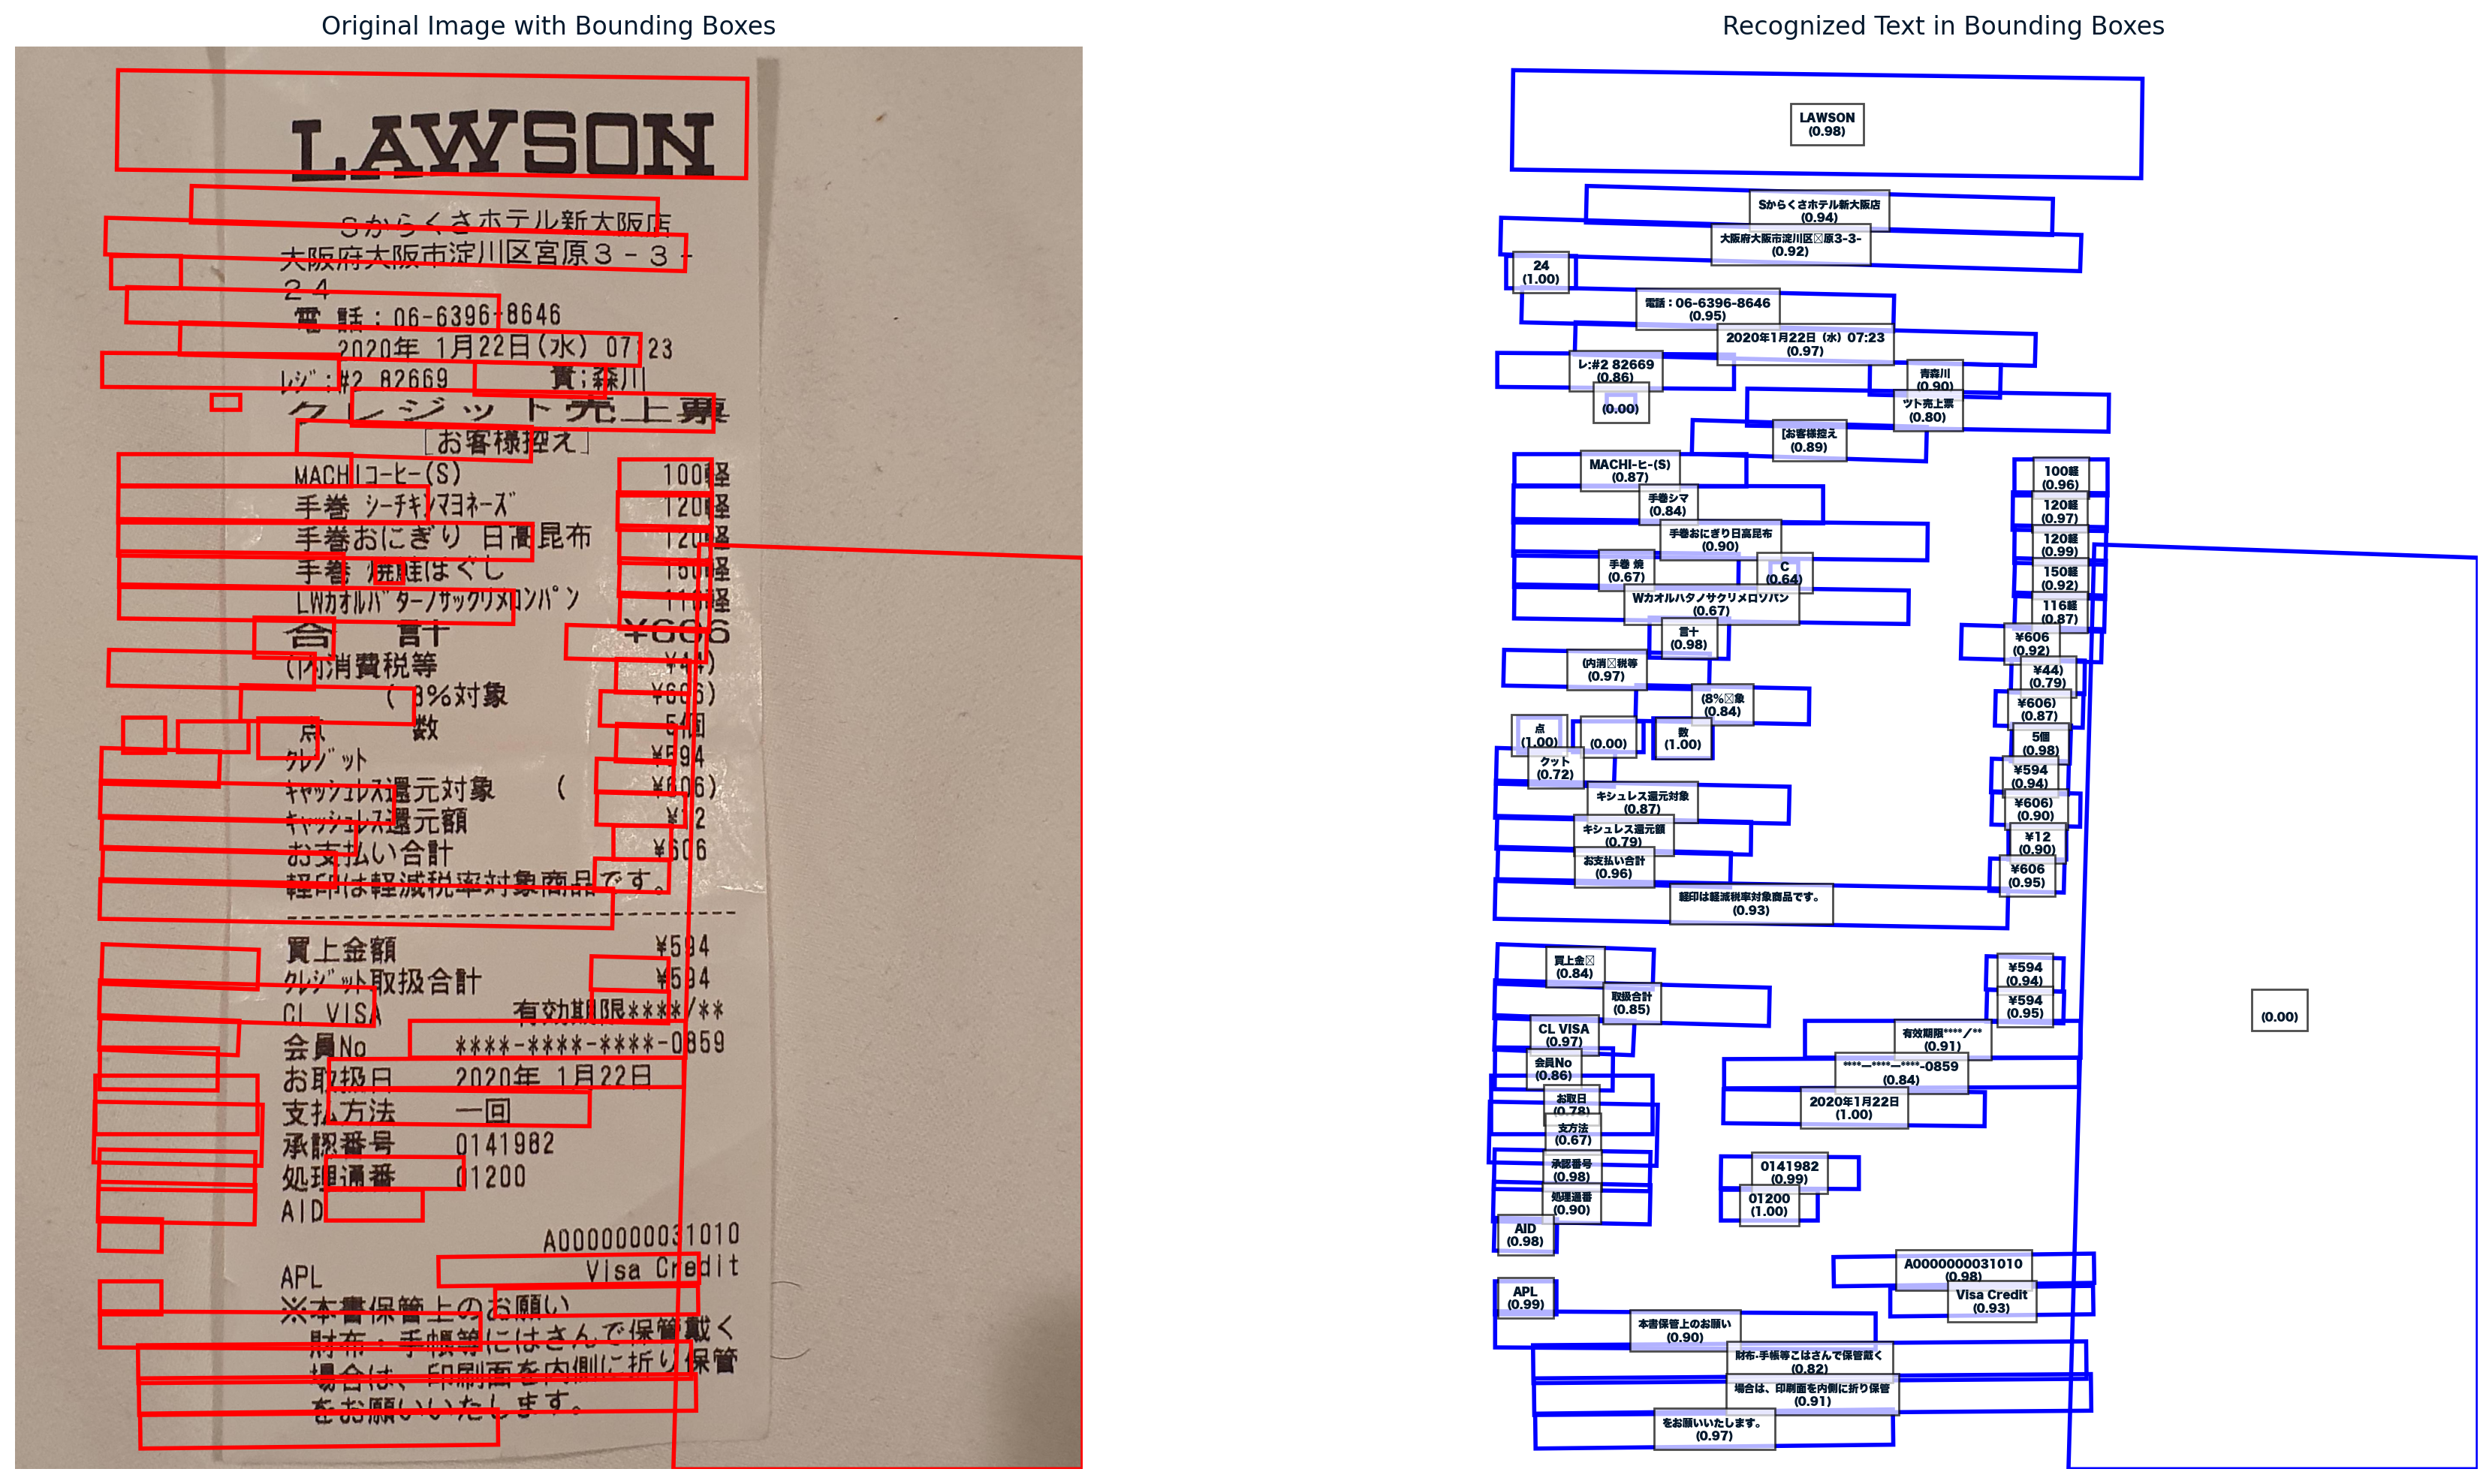

In [2]:
# Core dependencies
from paddleocr import PaddleOCR
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Setup OCR and paths
ocr = PaddleOCR(use_angle_cls=True, lang='japan')
image_path = 'IMG_5787__jpn.jpeg'
font_path = 'japan.ttc'  # Japanese font for text rendering

def setup_japanese_fonts():
    # Configure matplotlib to display Japanese text
    font_prop = font_manager.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False

def plot_side_by_side_comparison(image_path, result):
    setup_japanese_fonts()

    # Prep images for display
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    white_image = np.ones_like(image) * 255
    
    # Create side-by-side plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(image)
    ax2.imshow(white_image)
    
    ax1.set_title('Original Image with Bounding Boxes', fontsize=12)
    ax2.set_title('Recognized Text in Bounding Boxes', fontsize=12)
    
    # Extract OCR results
    boxes = result[0]['rec_polys']
    texts = result[0]['rec_texts']
    scores = result[0]['rec_scores']
    
    # Draw boxes and text
    for box, text, confidence in zip(boxes, texts, scores):
        box = np.array(box)
        
        # Add bounding boxes to both images
        polygon1 = plt.Polygon(box, fill=False, edgecolor='red', linewidth=2)
        polygon2 = plt.Polygon(box, fill=False, edgecolor='blue', linewidth=2)
        ax1.add_patch(polygon1)
        ax2.add_patch(polygon2)
        
        # Add text labels with confidence scores
        center_x = np.mean(box[:, 0])
        center_y = np.mean(box[:, 1])
        ax2.text(center_x, center_y, f'{text}\n({confidence:.2f})', 
                horizontalalignment='center',
                verticalalignment='center',
                bbox=dict(facecolor='white', alpha=0.7),
                fontproperties=font_manager.FontProperties(fname=font_path, size=5))
    
    ax1.axis('off')
    ax2.axis('off')
    plt.tight_layout()
    plt.savefig('comparison_image__paddleocr.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run OCR and create visualization
result = ocr.ocr(image_path)
plot_side_by_side_comparison(image_path, result)



The image shows a side-by-side comparison of a Japanese store receipt. The left side shows the original receipt with red bounding boxes, while the right side displays a clean visualization with blue bounding boxes and recognized text. The OCR successfully detected and recognized most text elements, including the store name "LAWSON", address, date, and transaction details. 

However, there are two notable issues:
1. The detection includes empty spaces, particularly in border areas, creating unnecessary bounding boxes.
2. The confidence scores vary significantly across detected regions - while some text is recognized with high confidence (above 0.90 or 90%), there are areas where the confidence score is 0.00 (0%) because they are essentially blank spaces or contain no meaningful text. For context, the scores in PaddleOCR is directly translated to how confident it is in its text recognition for the particular box.

## Future Improvements

The OCR pipeline's accuracy could be improved by implementing image preprocessing techniques such as contrast adjustment, noise reduction, and automated removal of blank spaces, particularly in border regions. 

The system could be expanded to handle receipts in other East Asian languages, specifically Chinese (both Traditional and Simplified) and Korean, allowing for broader application and testing of mixed-language scenarios.


As someone just starting out in Computer Vision, working on this project has been both exciting and eye-opening. Getting my hands dirty with OCR has given me a first-hand feel of what CV can do in everyday applications. While there's still so much to learn, I'm grateful for this first step into the field. If you're also new to CV and trying things out, I hope this project helps you in some way. Cheers!